# Using Python tools for a analysis of COVID-19 data

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import plotly.graph_objects as go
import plotly.express as px

import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

plt.rcParams.update({'font.size': 16})

### Obs.: Plotly doesn't open in Github. Please download notebook to use.

In [2]:
pd.set_option("display.precision", 5)
pd.set_option('display.max_rows', 15)

In [3]:
pd.options.display.float_format = '{:.4f}'.format

### <span style="color:red">Selecting Countries by the following conditions: 50k total cases and 35k deaths</span>

In [4]:
numberCases = 50000
numberDeaths = 35000

### <span style="color:red">Analysis of the last N days</span>

In [5]:
Ndays = '150days'

###  <span style="color:red">Day range for matplotlib</span>

In [6]:
Ninterval = 10

In [7]:
url = 'https://covid.ourworldindata.org/data/owid-covid-data.csv'

In [8]:
# filename = '/home/davi/Documents/Python/Covid-19-Data/owid-covid-data.csv'

In [9]:
# df = pd.read_csv(filename)
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])
df['location'] = df['location'].replace(['United States'],'United_States')
df['location'] = df['location'].replace(['United Kingdom'],'United_Kingdom')
df

iso_code      continent       location       date  total_cases  \
0          ABW  North America          Aruba 2020-03-13       2.0000   
1          ABW  North America          Aruba 2020-03-19          nan   
2          ABW  North America          Aruba 2020-03-20       4.0000   
3          ABW  North America          Aruba 2020-03-21          nan   
4          ABW  North America          Aruba 2020-03-22          nan   
...        ...            ...            ...        ...          ...   
37623      NaN            NaN  International 2020-03-06          nan   
37624      NaN            NaN  International 2020-03-07          nan   
37625      NaN            NaN  International 2020-03-08          nan   
37626      NaN            NaN  International 2020-03-09          nan   
37627      NaN            NaN  International 2020-03-10     696.0000   

       new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0         2.0000                 nan        0.0000      0.0000   
1            nan              0.2860           nan         nan   
2         2.0000              0.2860        0.0000      0.0000   
3            nan              0.2860           nan         nan   
4            nan              0.2860           nan         nan   
...          ...                 ...           ...         ...   
37623        nan              0.0000           nan         nan   
37624        nan              0.0000           nan         nan   
37625        nan              0.0000           nan         nan   
37626        nan              0.0000           nan         nan   
37627    -9.0000             -1.2860        7.0000      1.0000   

       new_deaths_smoothed  ...  aged_70_older  gdp_per_capita  \
0                      nan  ...         7.4520      35973.7810   
1                   0.0000  ...         7.4520      35973.7810   
2                   0.0000  ...         7.4520      35973.7810   
3                   0.0000  ...         7.4520      35973.7810   
4                   0.0000  ...         7.4520      35973.7810   
...                    ...  ...            ...             ...   
37623               0.2860  ...            nan             nan   
37624               0.0000  ...            nan             nan   
37625               0.0000  ...            nan             nan   
37626               0.0000  ...            nan             nan   
37627               0.1430  ...            nan             nan   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0                  nan                    nan              11.6200   
1                  nan                    nan              11.6200   
2                  nan                    nan              11.6200   
3                  nan                    nan              11.6200   
4                  nan                    nan              11.6200   
...                ...                    ...                  ...   
37623              nan                    nan                  nan   
37624              nan                    nan                  nan   
37625              nan                    nan                  nan   
37626              nan                    nan                  nan   
37627              nan                    nan                  nan   

       female_smokers  male_smokers  handwashing_facilities  \
0                 nan           nan                     nan   
1                 nan           nan                     nan   
2                 nan           nan                     nan   
3                 nan           nan                     nan   
4                 nan           nan                     nan   
...               ...           ...                     ...   
37623             nan           nan                     nan   
37624             nan           nan                     nan   
37625             nan           nan                     nan   
37626             nan           nan                     nan   
37627             nan

In [10]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'tests_per_case',
 'positive_rate',
 'tests_units',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy']

In [11]:
df = df.loc[:,['date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
df = df[df['date'] > pd.to_datetime("today") - pd.to_timedelta(Ndays)]
df = df.sort_values(by=['total_cases'], ascending=True)
df

date                          location  total_cases  total_deaths  \
9185  2020-03-24                          Dominica       1.0000        0.0000   
25282 2020-03-23                             Niger       1.0000        0.0000   
33690 2020-03-22                             Timor       1.0000        0.0000   
10487 2020-03-22                           Eritrea       1.0000        0.0000   
9036  2020-03-23                          Djibouti       1.0000        0.0000   
...          ...                               ...          ...           ...   
35717 2020-03-22  Saint Vincent and the Grenadines          nan           nan   
35718 2020-03-23  Saint Vincent and the Grenadines          nan           nan   
35719 2020-03-24  Saint Vincent and the Grenadines          nan           nan   
35961 2020-06-18                         Venezuela          nan           nan   
36173 2020-03-31      United States Virgin Islands          nan           nan   

       new_cases  new_deaths  
9185      0.0000      0.0000  
25282     0.0000      0.0000  
33690     1.0000      0.0000  
10487     1.0000      0.0000  
9036      0.0000      0.0000  
...          ...         ...  
35717        nan         nan  
35718        nan         nan  
35719        nan         nan  
35961        nan         nan  
36173        nan         nan  

[30960 rows x 6 columns]

# Number of cases and deaths in World

In [12]:
dfWorld = df[df['location'] == 'World']
dfWorld = dfWorld.sort_values(by='date', ascending=True)
dfWorld = dfWorld.loc[:,['date', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths']]
dfWorld.reset_index(drop=True, inplace=True)
dfWorld

date   total_cases  total_deaths   new_cases  new_deaths
0   2020-03-22   321828.0000    13061.0000  34208.0000   1709.0000
1   2020-03-23   356230.0000    14736.0000  34402.0000   1675.0000
2   2020-03-24   400559.0000    16581.0000  44329.0000   1845.0000
3   2020-03-25   442984.0000    18885.0000  42425.0000   2304.0000
4   2020-03-26   496652.0000    21499.0000  53668.0000   2614.0000
..         ...           ...           ...         ...         ...
144 2020-08-13 20638974.0000   749641.0000 288974.0000   7050.0000
145 2020-08-14 20925831.0000   754185.0000 286857.0000   4544.0000
146 2020-08-15 21214898.0000   760434.0000 289067.0000   6249.0000
147 2020-08-16 21474101.0000   766087.0000 259203.0000   5653.0000
148 2020-08-17 21689832.0000   770273.0000 215731.0000   4186.0000

[149 rows x 5 columns]

In [13]:
timestamps = sorted(set(dfWorld.loc[:, 'date'].values))
timestamps

[numpy.datetime64('2020-03-22T00:00:00.000000000'),
 numpy.datetime64('2020-03-23T00:00:00.000000000'),
 numpy.datetime64('2020-03-24T00:00:00.000000000'),
 numpy.datetime64('2020-03-25T00:00:00.000000000'),
 numpy.datetime64('2020-03-26T00:00:00.000000000'),
 numpy.datetime64('2020-03-27T00:00:00.000000000'),
 numpy.datetime64('2020-03-28T00:00:00.000000000'),
 numpy.datetime64('2020-03-29T00:00:00.000000000'),
 numpy.datetime64('2020-03-30T00:00:00.000000000'),
 numpy.datetime64('2020-03-31T00:00:00.000000000'),
 numpy.datetime64('2020-04-01T00:00:00.000000000'),
 numpy.datetime64('2020-04-02T00:00:00.000000000'),
 numpy.datetime64('2020-04-03T00:00:00.000000000'),
 numpy.datetime64('2020-04-04T00:00:00.000000000'),
 numpy.datetime64('2020-04-05T00:00:00.000000000'),
 numpy.datetime64('2020-04-06T00:00:00.000000000'),
 numpy.datetime64('2020-04-07T00:00:00.000000000'),
 numpy.datetime64('2020-04-08T00:00:00.000000000'),
 numpy.datetime64('2020-04-09T00:00:00.000000000'),
 numpy.datet

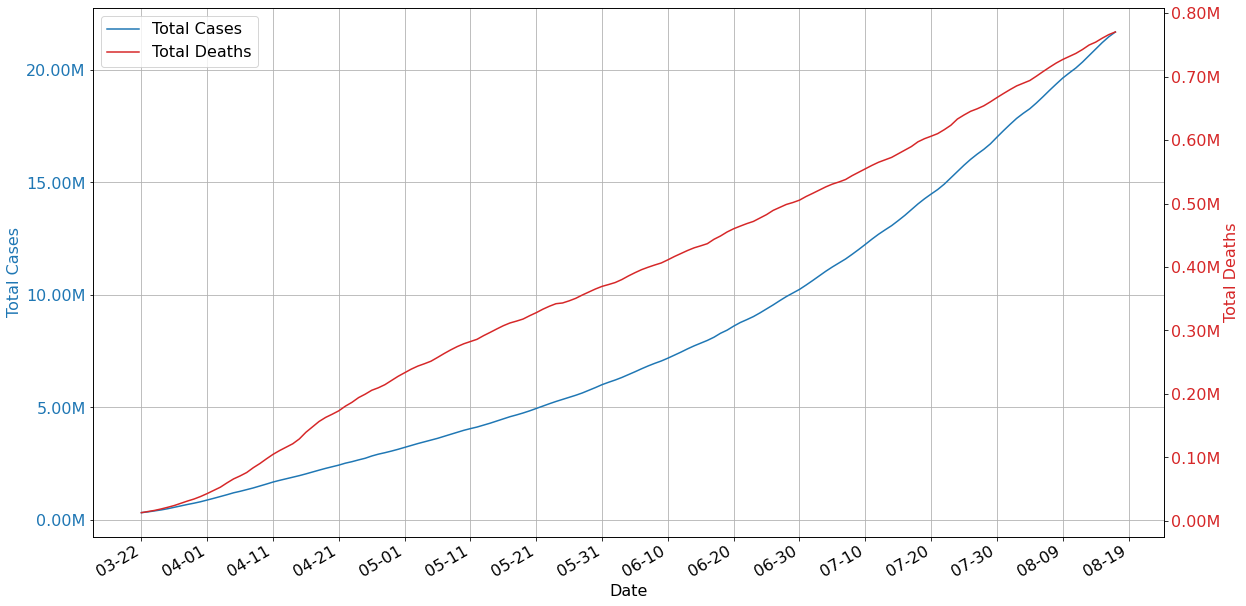

In [14]:
fig, ax1 = plt.subplots(figsize=(19.20,10.80))

color = 'tab:blue'
ax1.plot(dfWorld.date, dfWorld.total_cases, color=color, label='Total Cases')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
ax2 = ax1.twinx()

color = 'tab:red'
ax2.plot(dfWorld.date, dfWorld.total_deaths, color=color, label = 'Total Deaths')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Deaths', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
plt.gcf().autofmt_xdate()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

plt.show()

### Daily deaths [WORLD]

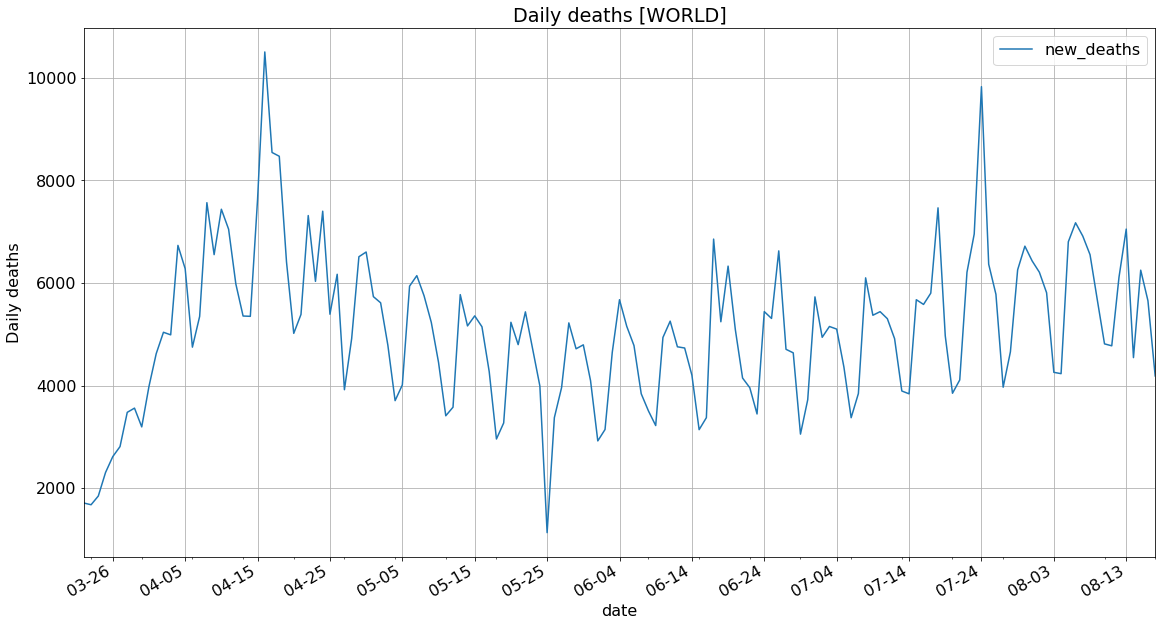

In [15]:
dfWorld.plot(x='date', y='new_deaths', figsize=(19.20,10.80))

plt.ylabel('Daily deaths')
plt.title('Daily deaths [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [16]:
figWorld = go.Figure()
figWorld.add_trace(go.Scatter(x=dfWorld.date, y=dfWorld.new_deaths, name='Daily Deaths'))

figWorld.update_traces(mode="markers+lines")
figWorld.update_layout(xaxis_tickformat = '%m-%d',
                       title='Daily Deaths [WORLD]')

figWorld.update_xaxes(nticks=25, tickangle=315)
figWorld.show()

### Daily cases [WORLD]

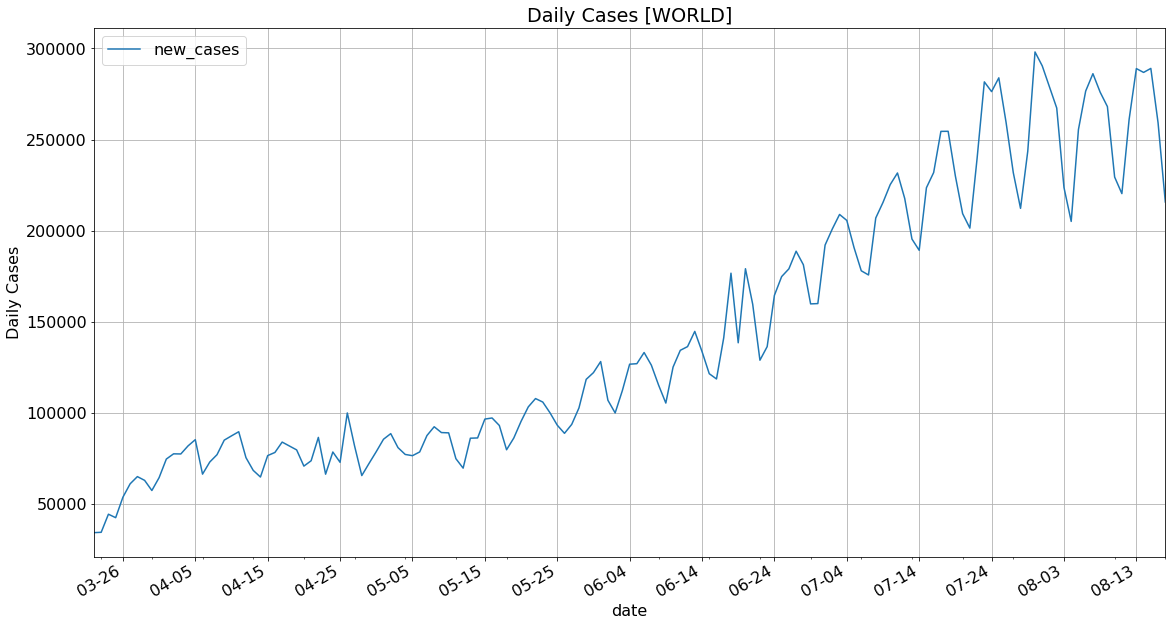

In [17]:
dfWorld.plot(x='date', y='new_cases', figsize=(19.20,10.80))

plt.ylabel('Daily Cases')
plt.title('Daily Cases [WORLD]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

In [18]:
mainCountries = df[
        (df['total_cases'] >= numberCases) & 
        (df['total_deaths'] >= numberDeaths) &
        (df['location'] != 'World') &
        (df['location'] != 'International')
]
mainCountries = mainCountries.sort_values(by=['total_cases'], ascending=False)
mainCountries = mainCountries.dropna()
mainCountries

date        location  total_cases  total_deaths  new_cases  \
35399 2020-08-17   United_States 5403269.0000   170052.0000 42104.0000   
35398 2020-08-16   United_States 5361165.0000   169481.0000 48085.0000   
35397 2020-08-15   United_States 5313080.0000   168446.0000 64838.0000   
35396 2020-08-14   United_States 5248242.0000   167110.0000 51094.0000   
35395 2020-08-13   United_States 5197148.0000   166027.0000 55941.0000   
...          ...             ...          ...           ...        ...   
12634 2020-05-24  United_Kingdom  243081.0000    36734.0000  2062.0000   
12633 2020-05-23  United_Kingdom  241019.0000    36451.0000  2574.0000   
12632 2020-05-22  United_Kingdom  238445.0000    36093.0000  2718.0000   
12631 2020-05-21  United_Kingdom  235727.0000    35755.0000  3052.0000   
12630 2020-05-20  United_Kingdom  232675.0000    35386.0000  2589.0000   

       new_deaths  
35399    571.0000  
35398   1035.0000  
35397   1336.0000  
35396   1083.0000  
35395   1490.0000  
...           ...  
12634    283.0000  
12633    358.0000  
12632    338.0000  
12631    369.0000  
12630    548.0000  

[371 rows x 6 columns]

In [19]:
dfCountry = mainCountries['location'].astype(str).unique()
dfCountry

array(['United_States', 'Brazil', 'India', 'Mexico', 'United_Kingdom',
       'Italy'], dtype=object)

In [20]:
d = {}
for index in range(len(dfCountry)):
    d[index] = df[df['location'] == dfCountry[index]]
    d[index].reset_index(drop=True, inplace=True)

In [21]:
d[1]

date location  total_cases  total_deaths  new_cases  new_deaths
0   2020-03-22   Brazil    1128.0000       18.0000   224.0000      7.0000
1   2020-03-23   Brazil    1546.0000       25.0000   418.0000      7.0000
2   2020-03-24   Brazil    1891.0000       34.0000   345.0000      9.0000
3   2020-03-25   Brazil    2201.0000       46.0000   310.0000     12.0000
4   2020-03-26   Brazil    2433.0000       57.0000   232.0000     11.0000
..         ...      ...          ...           ...        ...         ...
144 2020-08-13   Brazil 3164785.0000   104201.0000 55155.0000   1175.0000
145 2020-08-14   Brazil 3224876.0000   105463.0000 60091.0000   1262.0000
146 2020-08-15   Brazil 3275520.0000   106523.0000 50644.0000   1060.0000
147 2020-08-16   Brazil 3317096.0000   107232.0000 41576.0000    709.0000
148 2020-08-17   Brazil 3340197.0000   107852.0000 23101.0000    620.0000

[149 rows x 6 columns]

In [22]:
totalCases_list=[]
totalDeaths_list=[]
newCases_list=[]
newDeaths_list=[]

for index in range(len(dfCountry)):  
    
    totalCases = [d[index]['total_cases']]
    totalDeaths = [d[index]['total_deaths']]
    newCases = [d[index]['new_cases']]
    newDeaths = [d[index]['new_deaths']]
    
    header = [dfCountry[index]]
    
    totalCases = pd.concat(totalCases, axis=1, keys=header)
    totalDeaths = pd.concat(totalDeaths, axis=1, keys=header)
    newCases = pd.concat(newCases, axis=1, keys=header)
    newDeaths = pd.concat(newDeaths, axis=1, keys=header)
    
    totalCases_list.append(totalCases)
    totalDeaths_list.append(totalDeaths)
    newCases_list.append(newCases)
    newDeaths_list.append(newDeaths)

In [23]:
dfTotalCases=[]
dfTotalDeaths=[]
dfNewCases=[]
dfNewDeaths=[]

for index in range(len(dfCountry)):
    dfTotalCases = pd.concat(totalCases_list, axis=1)
    dfTotalDeaths = pd.concat(totalDeaths_list, axis=1)
    dfNewCases = pd.concat(newCases_list, axis=1)
    dfNewDeaths = pd.concat(newDeaths_list,axis=1)
    
dfTotalCases.insert(0, 'date', timestamps)
dfTotalDeaths.insert(0, 'date', timestamps)
dfNewCases.insert(0, 'date', timestamps)
dfNewDeaths.insert(0, 'date', timestamps)

## <ins>Total cases</ins> in the most affected countries

In [24]:
dfTotalCases.sort_values(by=['date'], ascending=True)

date  United_States       Brazil        India      Mexico  \
0   2020-03-22     26747.0000    1128.0000     320.0000    251.0000   
1   2020-03-23     35206.0000    1546.0000     439.0000    316.0000   
2   2020-03-24     46442.0000    1891.0000     492.0000    367.0000   
3   2020-03-25     55231.0000    2201.0000     562.0000    405.0000   
4   2020-03-26     69194.0000    2433.0000     649.0000    475.0000   
..         ...            ...          ...          ...         ...   
144 2020-08-13   5197148.0000 3164785.0000 2396637.0000 498380.0000   
145 2020-08-14   5248242.0000 3224876.0000 2461190.0000 505751.0000   
146 2020-08-15   5313080.0000 3275520.0000 2526192.0000 511369.0000   
147 2020-08-16   5361165.0000 3317096.0000 2589682.0000 517714.0000   
148 2020-08-17   5403269.0000 3340197.0000 2647663.0000 522162.0000   

     United_Kingdom       Italy  
0         7736.0000  53578.0000  
1         8934.0000  59138.0000  
2        10312.0000  63927.0000  
3        12650.0000  69176.0000  
4        15025.0000  74386.0000  
..              ...         ...  
144     313798.0000 251713.0000  
145     314927.0000 252235.0000  
146     316367.0000 252809.0000  
147     317444.0000 253438.0000  
148     318484.0000 253915.0000  

[149 rows x 7 columns]

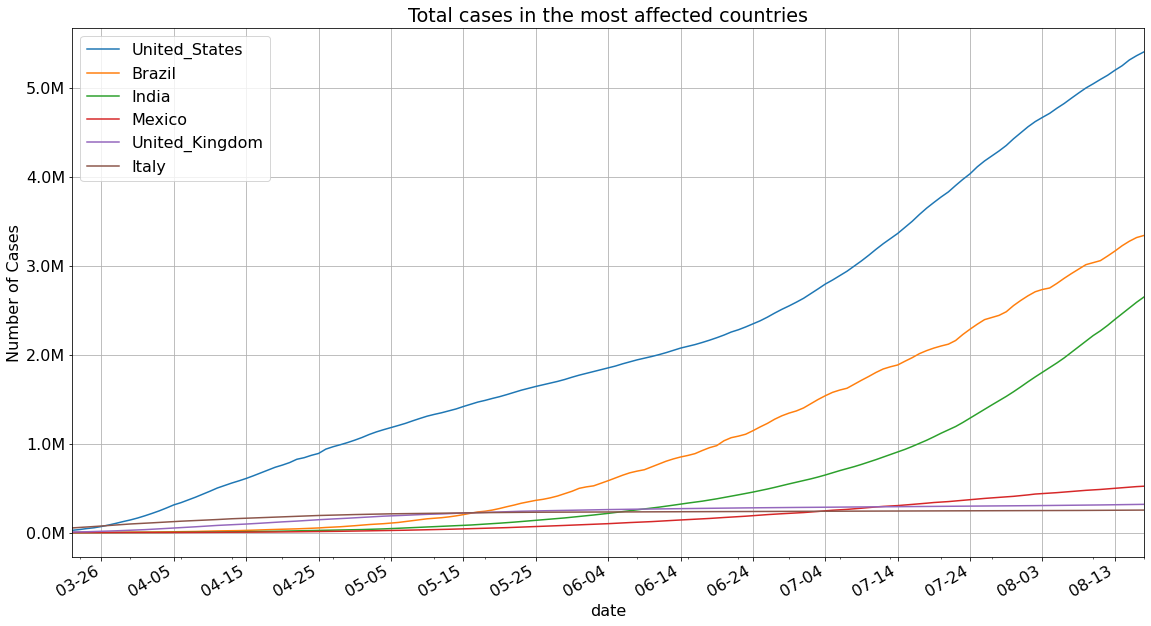

In [25]:
dfTotalCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Total cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.1f}'.format(y/1000000) + 'M'))

plt.grid()
plt.show()

## Log analysis - log<sub>b</sub><sup>x</sup>

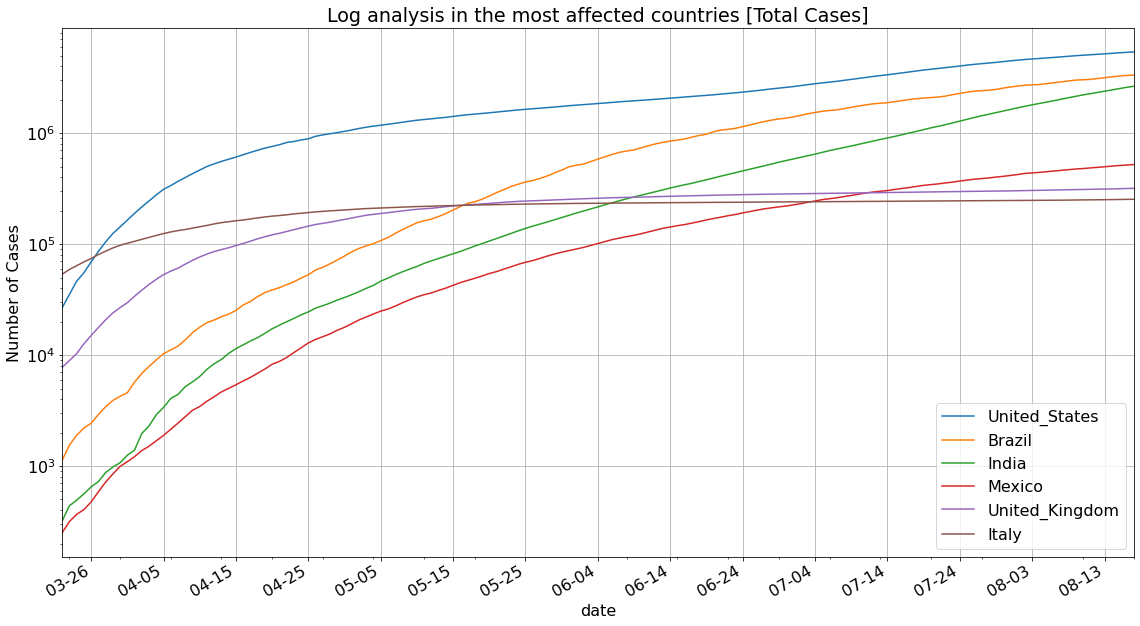

In [26]:
dfTotalCases.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of Cases')
plt.title('Log analysis in the most affected countries [Total Cases]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

## <ins>Total Deaths</ins> in the most affected countries

In [27]:
dfTotalDeaths.sort_values(by=['date'], ascending=True)

date  United_States      Brazil      India     Mexico  \
0   2020-03-22       340.0000     18.0000     4.0000     2.0000   
1   2020-03-23       471.0000     25.0000     7.0000     2.0000   
2   2020-03-24       590.0000     34.0000     9.0000     4.0000   
3   2020-03-25       801.0000     46.0000     9.0000     5.0000   
4   2020-03-26      1050.0000     57.0000    13.0000     5.0000   
..         ...            ...         ...        ...        ...   
144 2020-08-13    166027.0000 104201.0000 47033.0000 54666.0000   
145 2020-08-14    167110.0000 105463.0000 48040.0000 55293.0000   
146 2020-08-15    168446.0000 106523.0000 49036.0000 55908.0000   
147 2020-08-16    169481.0000 107232.0000 49980.0000 56543.0000   
148 2020-08-17    170052.0000 107852.0000 50921.0000 56757.0000   

     United_Kingdom      Italy  
0          250.0000  4827.0000  
1          285.0000  5476.0000  
2          359.0000  6077.0000  
3          508.0000  6820.0000  
4          695.0000  7505.0000  
..              ...        ...  
144      46706.0000 35225.0000  
145      41347.0000 35231.0000  
146      41357.0000 35234.0000  
147      41361.0000 35392.0000  
148      41366.0000 35396.0000  

[149 rows x 7 columns]

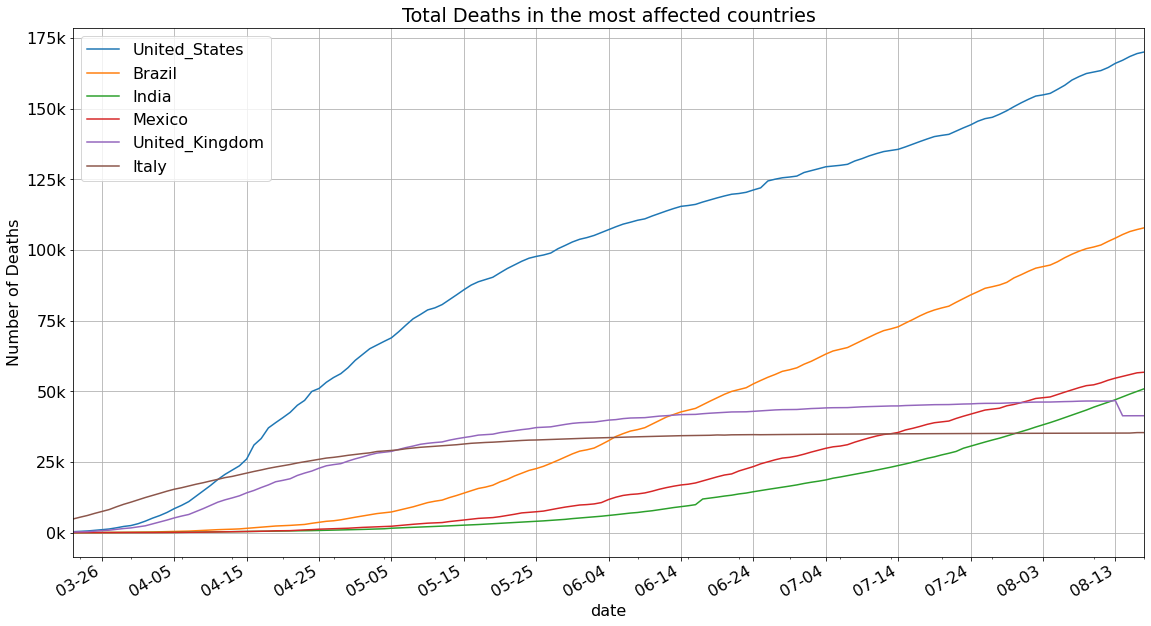

In [28]:
dfTotalDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Number of Deaths')
plt.title('Total Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

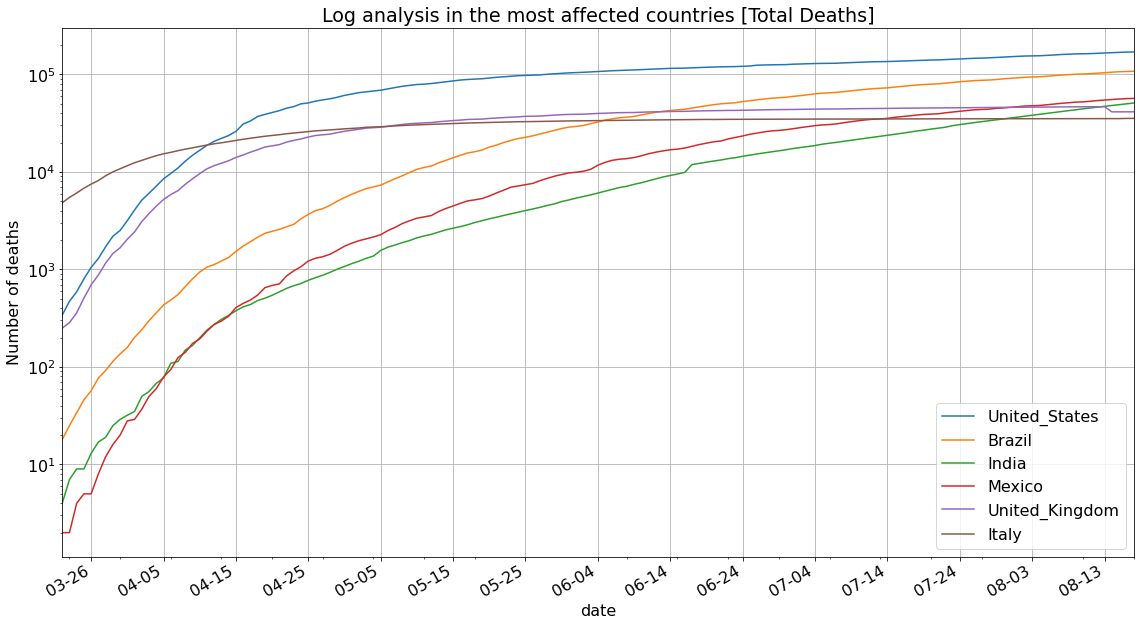

In [29]:
dfTotalDeaths.plot(x='date', y=dfCountry, logx=False, logy=True, figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Log analysis in the most affected countries [Total Deaths]')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Total cases and deaths by country

In [30]:
dfTotalCases

date  United_States       Brazil        India      Mexico  \
0   2020-03-22     26747.0000    1128.0000     320.0000    251.0000   
1   2020-03-23     35206.0000    1546.0000     439.0000    316.0000   
2   2020-03-24     46442.0000    1891.0000     492.0000    367.0000   
3   2020-03-25     55231.0000    2201.0000     562.0000    405.0000   
4   2020-03-26     69194.0000    2433.0000     649.0000    475.0000   
..         ...            ...          ...          ...         ...   
144 2020-08-13   5197148.0000 3164785.0000 2396637.0000 498380.0000   
145 2020-08-14   5248242.0000 3224876.0000 2461190.0000 505751.0000   
146 2020-08-15   5313080.0000 3275520.0000 2526192.0000 511369.0000   
147 2020-08-16   5361165.0000 3317096.0000 2589682.0000 517714.0000   
148 2020-08-17   5403269.0000 3340197.0000 2647663.0000 522162.0000   

     United_Kingdom       Italy  
0         7736.0000  53578.0000  
1         8934.0000  59138.0000  
2        10312.0000  63927.0000  
3        12650.0000  69176.0000  
4        15025.0000  74386.0000  
..              ...         ...  
144     313798.0000 251713.0000  
145     314927.0000 252235.0000  
146     316367.0000 252809.0000  
147     317444.0000 253438.0000  
148     318484.0000 253915.0000  

[149 rows x 7 columns]

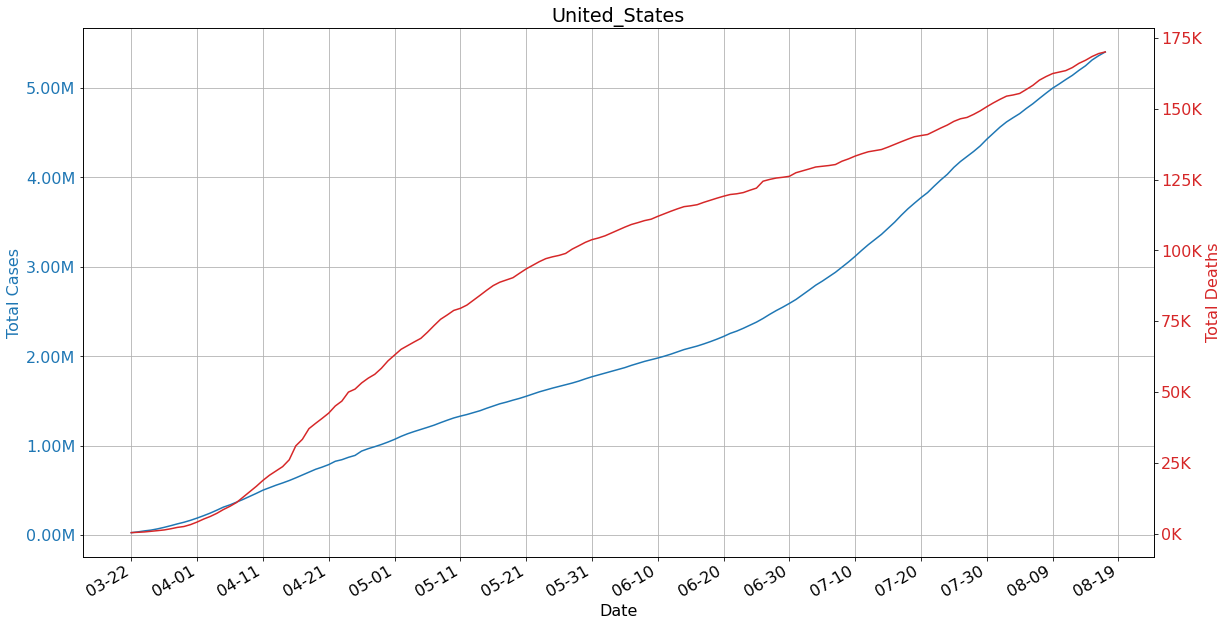

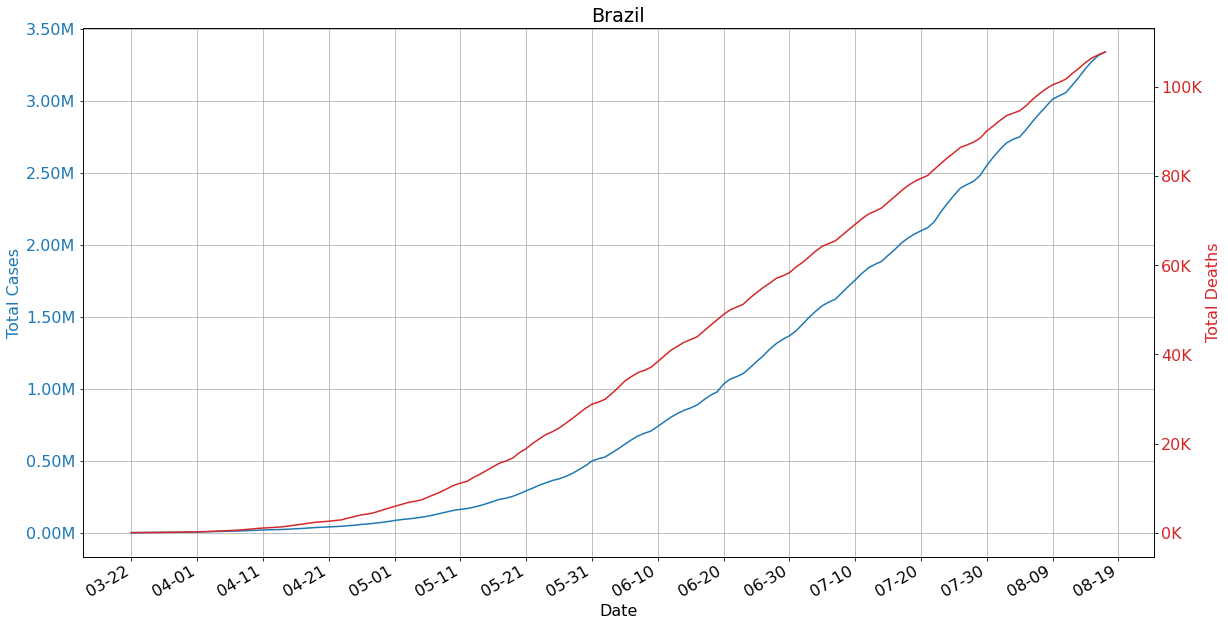

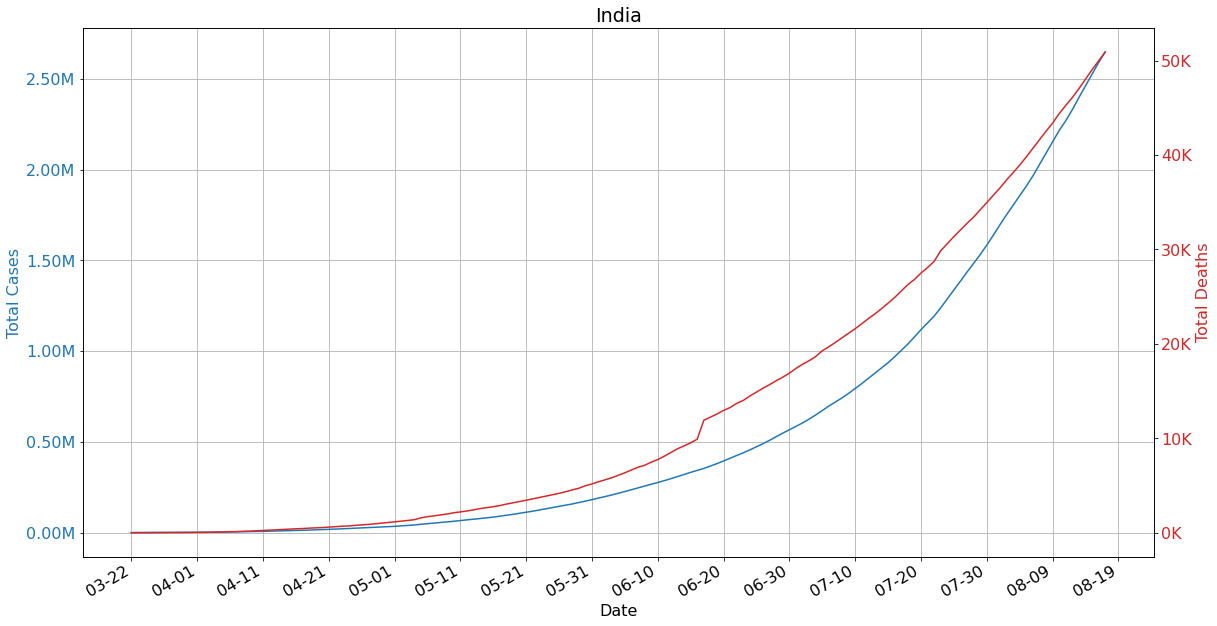

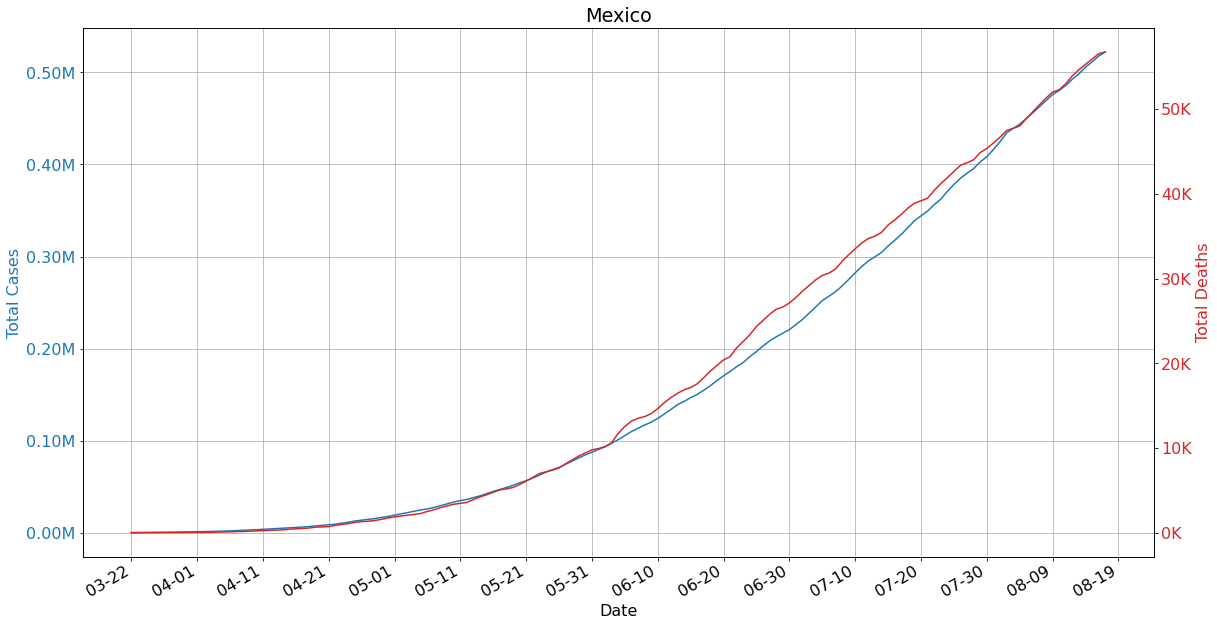

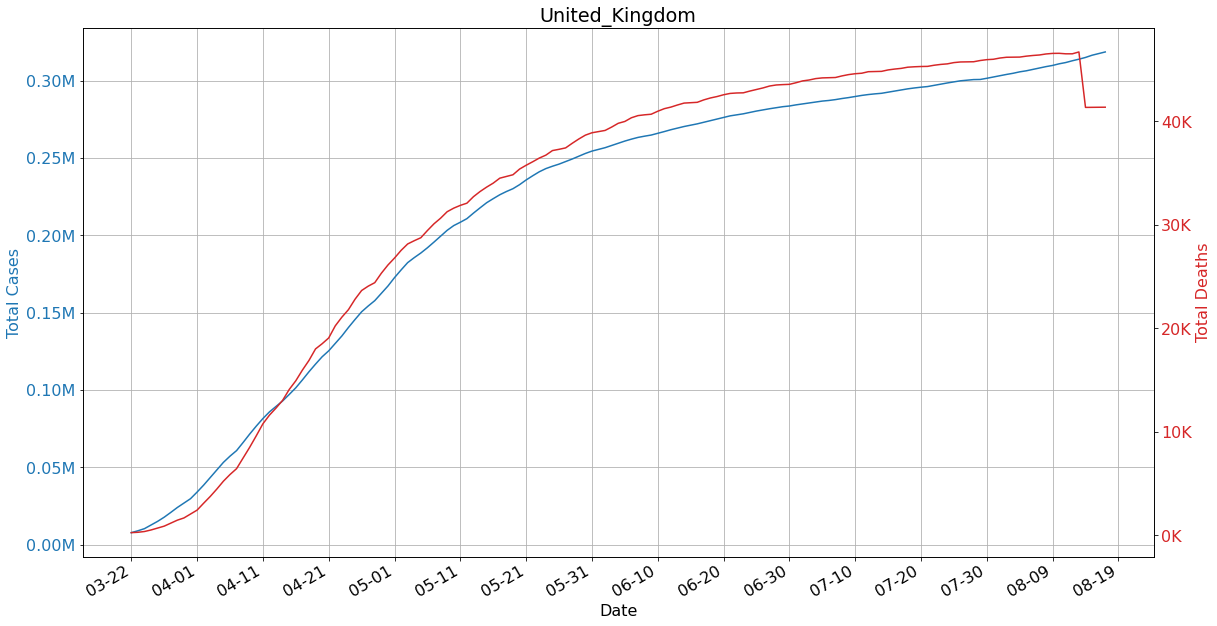

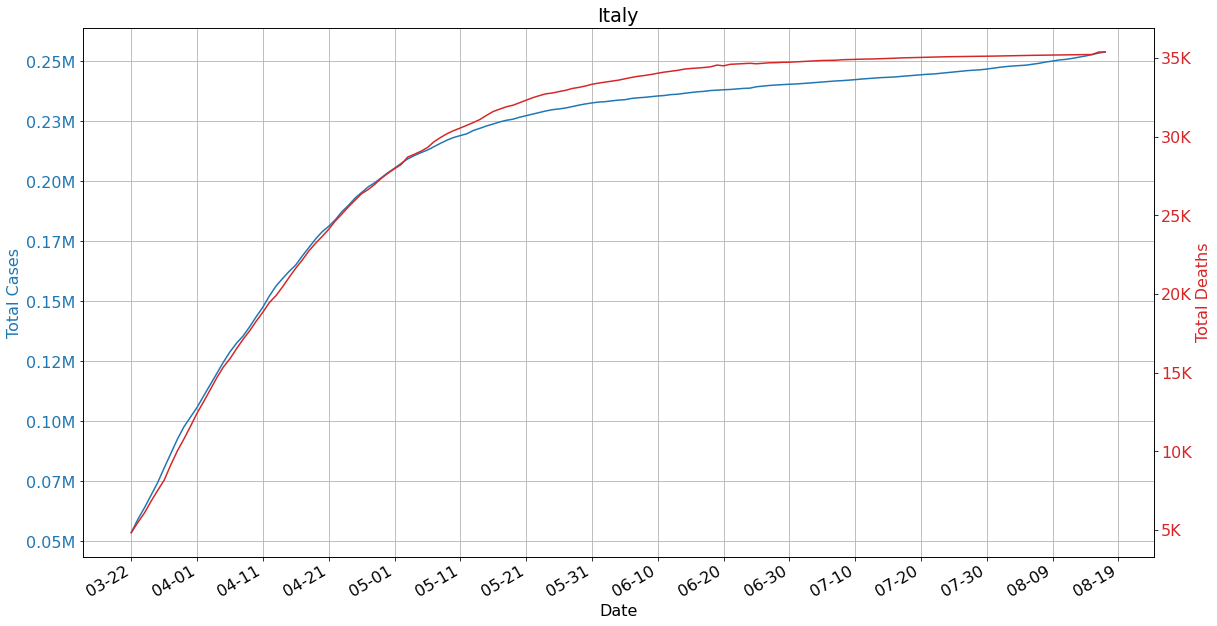

In [31]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfTotalCases.date, dfTotalCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Total Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfTotalDeaths.date, dfTotalDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Total Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000000) + 'M'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()


## <ins>Daily Cases</ins> in the most affected countries

In [32]:
dfNewCases.sort_values(by=['date'], ascending=True)

date  United_States     Brazil      India    Mexico  United_Kingdom  \
0   2020-03-22      7123.0000   224.0000    89.0000   48.0000       1255.0000   
1   2020-03-23      8459.0000   418.0000   119.0000   65.0000       1198.0000   
2   2020-03-24     11236.0000   345.0000    53.0000   51.0000       1378.0000   
3   2020-03-25      8789.0000   310.0000    70.0000   38.0000       2338.0000   
4   2020-03-26     13963.0000   232.0000    87.0000   70.0000       2375.0000   
..         ...            ...        ...        ...       ...             ...   
144 2020-08-13     55941.0000 55155.0000 66999.0000 5858.0000       1009.0000   
145 2020-08-14     51094.0000 60091.0000 64553.0000 7371.0000       1129.0000   
146 2020-08-15     64838.0000 50644.0000 65002.0000 5618.0000       1440.0000   
147 2020-08-16     48085.0000 41576.0000 63490.0000 6345.0000       1077.0000   
148 2020-08-17     42104.0000 23101.0000 57981.0000 4448.0000       1040.0000   

        Italy  
0   6557.0000  
1   5560.0000  
2   4789.0000  
3   5249.0000  
4   5210.0000  
..        ...  
144  476.0000  
145  522.0000  
146  574.0000  
147  629.0000  
148  477.0000  

[149 rows x 7 columns]

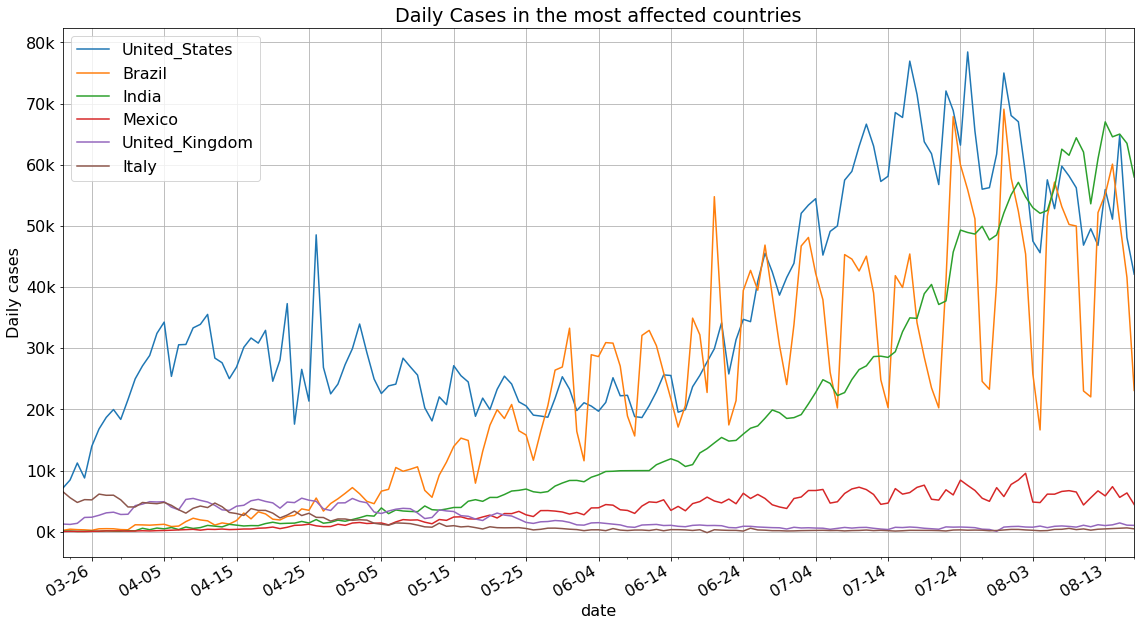

In [33]:
dfNewCases.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily cases')
plt.title('Daily Cases in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

#### Plotly example

In [34]:
toGo = dfNewCases.sort_values(by='date', ascending=False)
toGo = toGo.set_index('date')

In [35]:
figTest = go.Figure()
for index in range(len(dfCountry)):
    figTest.add_trace(go.Scatter(x=toGo.index, y=toGo.iloc[:,index], name=dfCountry[index]))

figTest.update_traces(mode="markers+lines")
figTest.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", 
                                  x=0.01, traceorder='reversed', font_size=15),
                                  title='Daily cases in the most affected countries')

figTest.show()

## <ins>Daily Deaths</ins> in the most affected countries

In [36]:
dfNewDeaths.sort_values(by=['date'], ascending=True)

date  United_States    Brazil     India   Mexico  United_Kingdom  \
0   2020-03-22        80.0000    7.0000    0.0000   0.0000         56.0000   
1   2020-03-23       131.0000    7.0000    3.0000   0.0000         35.0000   
2   2020-03-24       119.0000    9.0000    2.0000   2.0000         74.0000   
3   2020-03-25       211.0000   12.0000    0.0000   1.0000        149.0000   
4   2020-03-26       249.0000   11.0000    4.0000   0.0000        187.0000   
..         ...            ...       ...       ...      ...             ...   
144 2020-08-13      1490.0000 1175.0000  942.0000 737.0000        180.0000   
145 2020-08-14      1083.0000 1262.0000 1007.0000 627.0000      -5359.0000   
146 2020-08-15      1336.0000 1060.0000  996.0000 615.0000         10.0000   
147 2020-08-16      1035.0000  709.0000  944.0000 635.0000          4.0000   
148 2020-08-17       571.0000  620.0000  941.0000 214.0000          5.0000   

       Italy  
0   795.0000  
1   649.0000  
2   601.0000  
3   743.0000  
4   685.0000  
..       ...  
144  10.0000  
145   6.0000  
146   3.0000  
147 158.0000  
148   4.0000  

[149 rows x 7 columns]

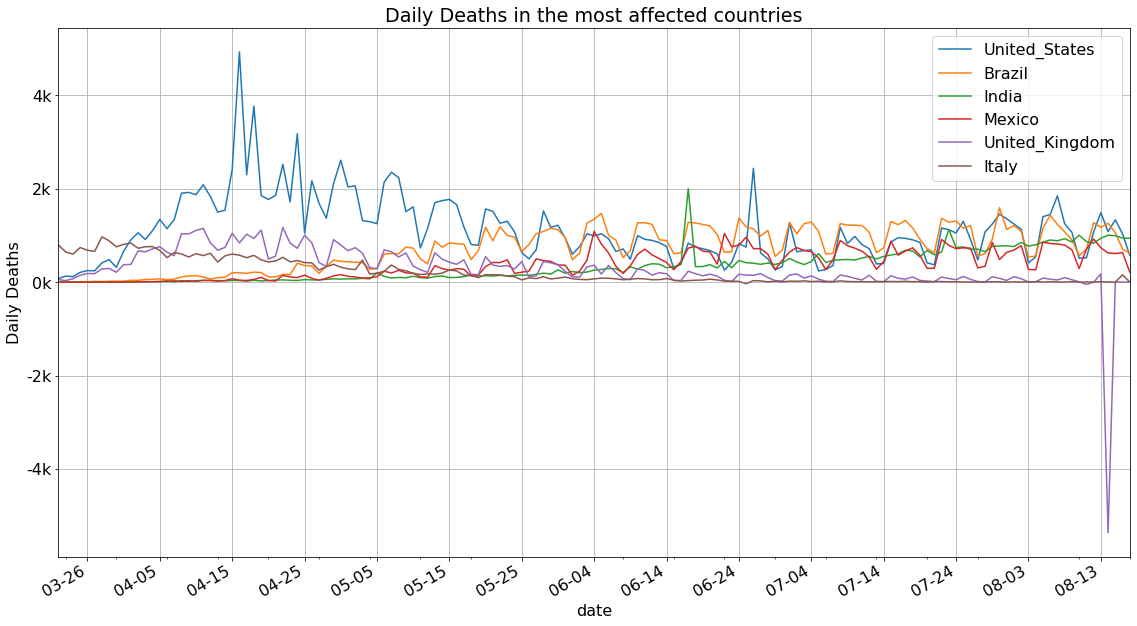

In [37]:
dfNewDeaths.plot(x='date', y=dfCountry, figsize=(19.20,10.80))

plt.ylabel('Daily Deaths')
plt.title('Daily Deaths in the most affected countries')

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000) + 'k'))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

### Daily cases and deaths by country

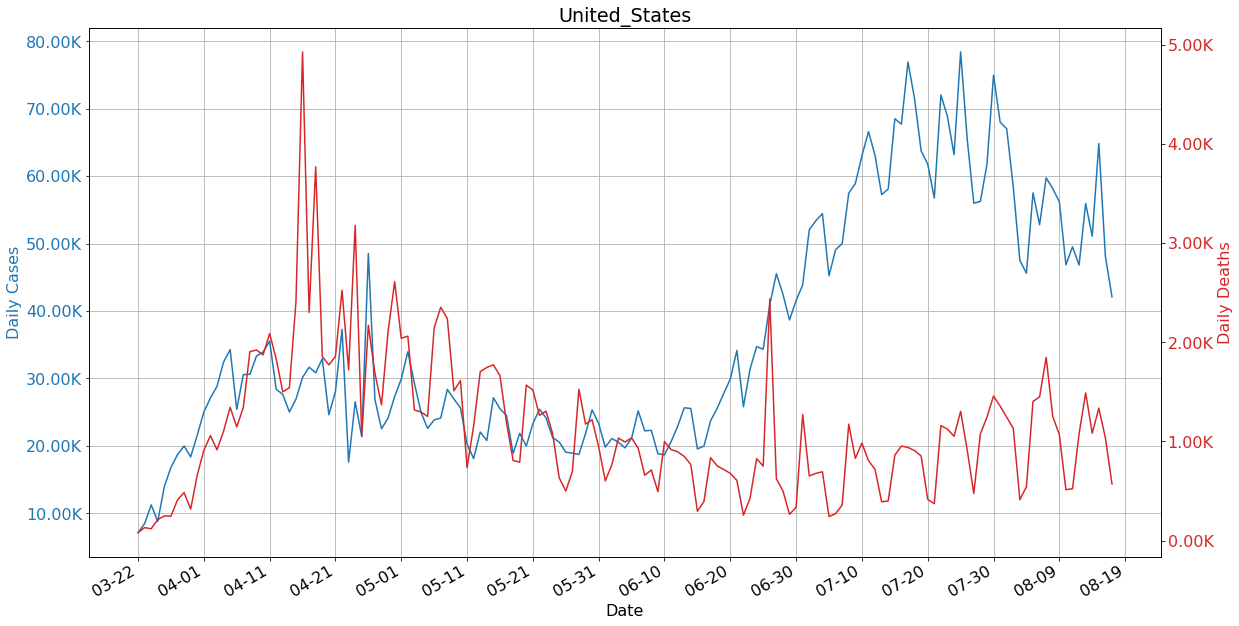

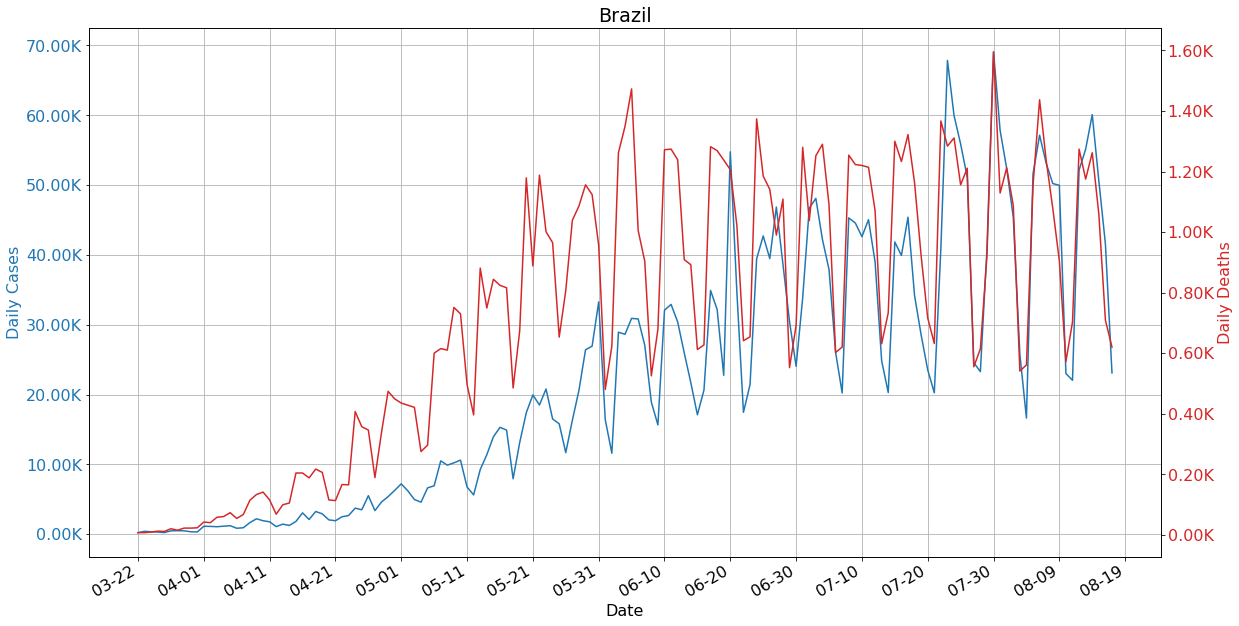

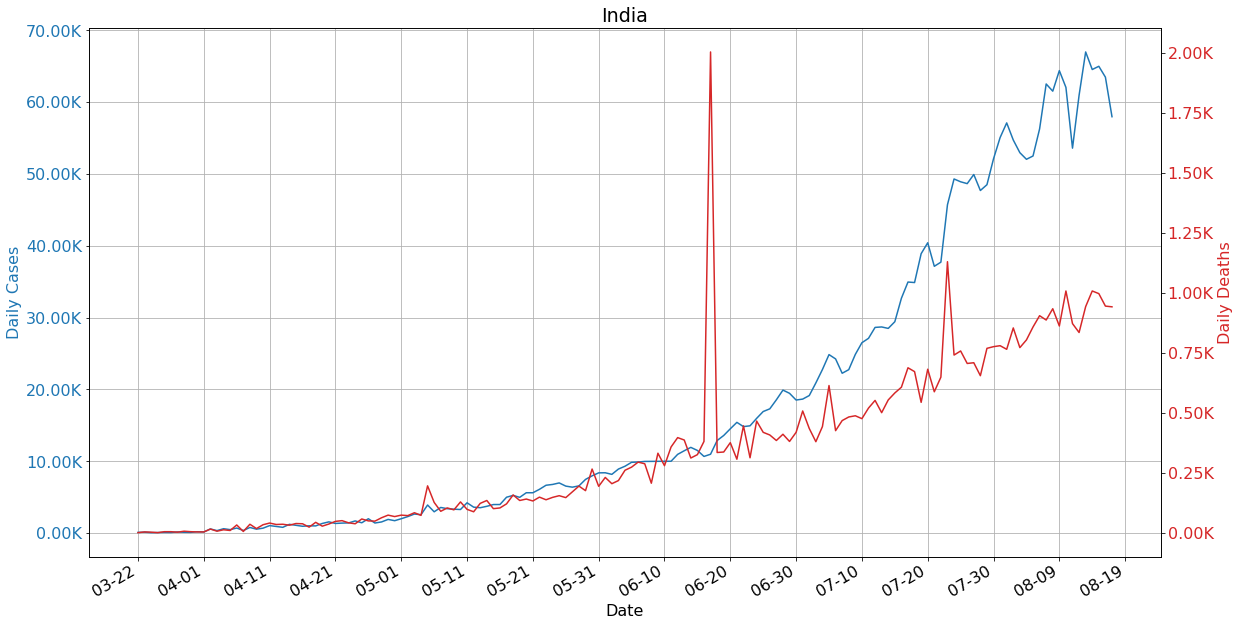

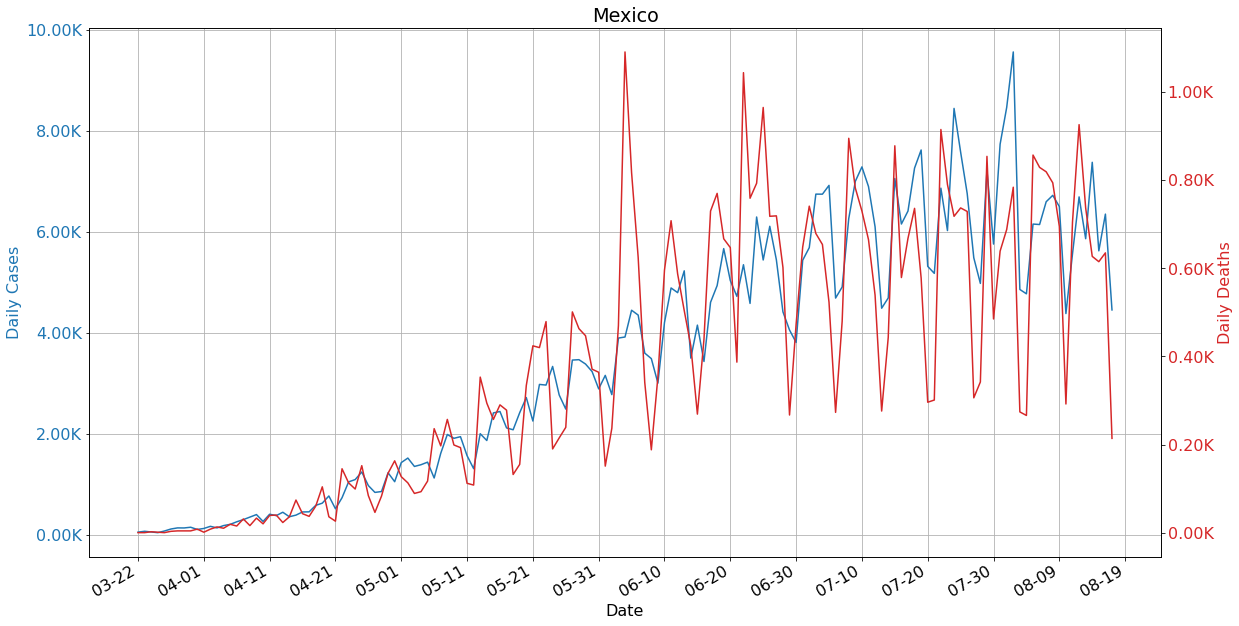

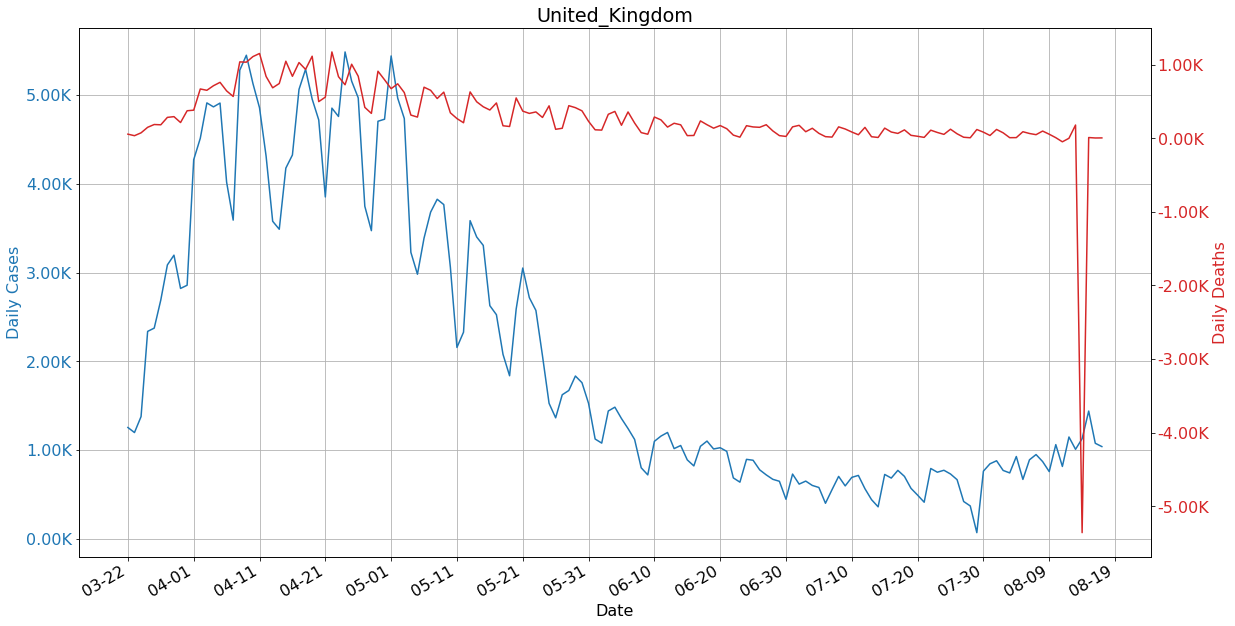

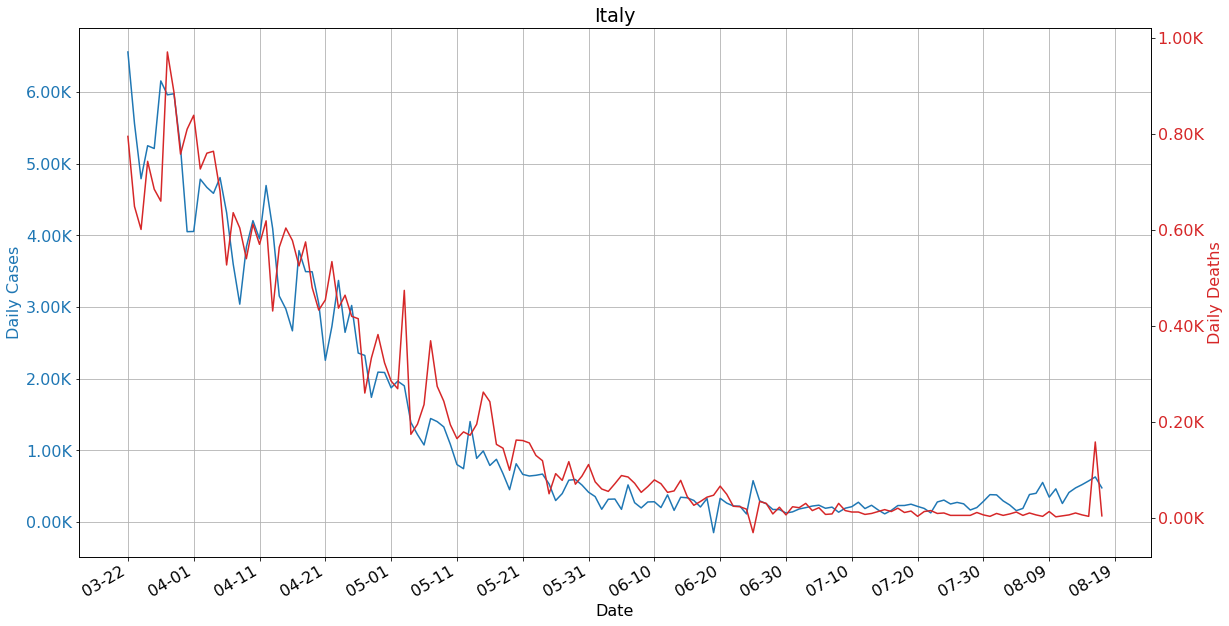

In [38]:
for index in range(1, len(dfCountry)+1,1):
    fig, ax1 = plt.subplots(figsize=(19.20,10.80))
    color = 'tab:blue'
    ax1.plot(dfNewCases.date, dfNewCases.iloc[:,index], color=color, label='Total Cases')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Daily Cases', color=color)
    plt.title(dfCountry[index-1])
    ax1.tick_params(axis='y', labelcolor=color)
    plt.ticklabel_format(style='plain', axis='y')
    
    plt.grid()
    
    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.plot(dfNewDeaths.date, dfNewDeaths.iloc[:,index], color=color, label = 'Total Deaths')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Daily Deaths', color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
    
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.2f}'.format(y/1000) + 'K'))

    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=Ninterval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

    plt.gcf().autofmt_xdate()
    plt.show()

## <span style="color:green">Brazil Cases</span>

### source: https://data.brasil.io/dataset/covid19/_meta/list.html

In [39]:
df = pd.read_csv('caso_full.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.dropna()
df

city  city_ibge_code       date  epidemiological_week  \
0          São Paulo    3550308.0000 2020-02-25                     9   
2          São Paulo    3550308.0000 2020-02-26                     9   
4          São Paulo    3550308.0000 2020-02-27                     9   
6          São Paulo    3550308.0000 2020-02-28                     9   
8          São Paulo    3550308.0000 2020-02-29                     9   
...              ...             ...        ...                   ...   
554656    Tocantínia    1721109.0000 2020-08-17                    34   
554657      Tupirama    1721257.0000 2020-08-17                    34   
554658    Tupiratins    1721307.0000 2020-08-17                    34   
554659  Wanderlândia    1722081.0000 2020-08-17                    34   
554660       Xambioá    1722107.0000 2020-08-17                    34   

        estimated_population_2019  is_last  is_repeated  \
0                   12252023.0000    False        False   
2                   12252023.0000    False        False   
4                   12252023.0000    False        False   
6                   12252023.0000    False        False   
8                   12252023.0000    False        False   
...                           ...      ...          ...   
554656                  7545.0000    False         True   
554657                  1891.0000    False         True   
554658                  2671.0000    False         True   
554659                 11683.0000    False         True   
554660                 11540.0000    False         True   

        last_available_confirmed  \
0                              1   
2                              1   
4                              1   
6                              2   
8                              2   
...                          ...   
554656                       312   
554657                        45   
554658                         7   
554659                       200   
554660                       611   

        last_available_confirmed_per_100k_inhabitants last_available_date  \
0                                              0.0082          2020-02-25   
2                                              0.0082          2020-02-26   
4                                              0.0082          2020-02-27   
6                                              0.0163          2020-02-28   
8                                              0.0163          2020-02-29   
...                                               ...                 ...   
554656                                      4135.1889          2020-08-15   
554657                                      2379.6933          2020-08-15   
554658                                       262.0741          2020-08-15   
554659                                      1711.8891          2020-08-15   
554660                                      5294.6274          2020-08-15   

        last_available_death_rate  last_available_deaths  order_for_place  \
0                          0.0000                      0                1   
2                          0.0000                      0                2   
4                          0.0000                      0                3   
6                          0.0000                      0                4   
8                          0.0000                      0                5   
...                           ...                    ...              ...   
554656                     0.0128                      4               91   
554657                     0.0222                      1               87   
554658                     0.0000                      0               87   
554659                     0.0250                      5              112   
554660                     0.0131                      8              101   

       place_type state  new_confirmed  new_deaths  
0            city    SP              1           0  
2            city    SP              0   

In [40]:
cities = set(df.loc[:, 'city'].values)

In [41]:
brStates = sorted(set(df.loc[:, 'state'].values))

In [42]:
print(pd.to_datetime("today") - pd.to_timedelta('4days'))

2020-08-14 01:44:18.806593


In [43]:
least_recent_date = df['date'].min()
least_recent_date

Timestamp('2020-02-25 00:00:00')

In [44]:
recent_date = df['date'].max()
recent_date

Timestamp('2020-08-17 00:00:00')

In [45]:
(recent_date - pd.to_timedelta('1days'))

Timestamp('2020-08-16 00:00:00')

In [46]:
dfSelect = df.loc[:,['date', 'state', 'city', 'new_confirmed', 'new_deaths']]
dfToday = dfSelect[dfSelect['date'] > (recent_date - pd.to_timedelta('1days'))]
dfToday

date state          city  new_confirmed  new_deaths
549123 2020-08-17    AC    Acrelândia              0           0
549124 2020-08-17    AC  Assis Brasil              0           0
549125 2020-08-17    AC     Brasiléia              0           0
549126 2020-08-17    AC        Bujari              0           0
549127 2020-08-17    AC      Capixaba              0           0
...           ...   ...           ...            ...         ...
554656 2020-08-17    TO    Tocantínia              0           0
554657 2020-08-17    TO      Tupirama              0           0
554658 2020-08-17    TO    Tupiratins              0           0
554659 2020-08-17    TO  Wanderlândia              0           0
554660 2020-08-17    TO       Xambioá              0           0

[5507 rows x 5 columns]

In [47]:
sumCases = dfSelect.groupby(['state']).sum()
sumCases.reset_index(level=0, inplace=True)
sumCases.loc[sumCases['new_confirmed'] <= 120000, ['state']] = 'Other_States'

In [48]:
sumCases = sumCases.groupby(['state']).sum()
sumCases = sumCases.sort_values(by=['new_confirmed'], ascending=False)
sumCases.reset_index(level=0, inplace=True)
sumCases

state  new_confirmed  new_deaths
0  Other_States        1391130       38237
1            SP         702596       26898
2            BA         211896        4381
3            CE         196418        8170
4            RJ         194288       14563
5            PA         178380        5944
6            MG         167995        3903
7            MA         136863        3264
8            DF         120321        1807

## Cases in Brazil cities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f67b4e01160>,
      dtype=object)

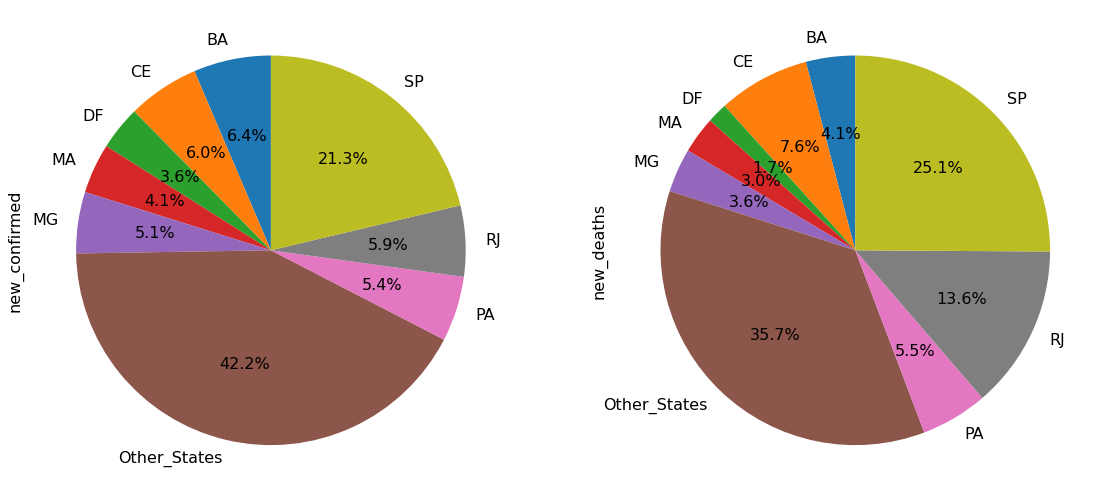

In [49]:
sumCases.groupby(['state']).sum().plot(kind='pie', legend=None, subplots=True, startangle=90,
                                       figsize=(19.20,10.80), autopct='%1.1f%%')

In [50]:
dfSP = dfToday[(dfToday['state'] == 'SP') & (dfToday['new_confirmed'] > 100)]
dfSP = dfSP.sort_values(by=['new_confirmed'], ascending=False)
dfSP

date state                   city  new_confirmed  new_deaths
554449 2020-08-17    SP              São Paulo            644          33
553977 2020-08-17    SP               Campinas            294           8
554165 2020-08-17    SP                Jundiaí            175           1
554405 2020-08-17    SP            Santo André            170           2
554439 2020-08-17    SP  São José do Rio Preto            161           9
553955 2020-08-17    SP      Bragança Paulista            143           0
554356 2020-08-17    SP         Ribeirão Preto            139           0
554425 2020-08-17    SP               Sorocaba            132           0
554440 2020-08-17    SP    São José dos Campos            110           5

In [51]:
today = (pd.to_datetime("today") - pd.to_timedelta('2days')).date()
today

datetime.date(2020, 8, 16)

In [52]:
# dfSP.plot.barh(x='city', y=['new_confirmed','new_deaths'], figsize=(19.20,10.80))
# plt.title('Daily cases and deaths in SP - '+str(today))
# plt.grid()

## Forecast to daily deaths [WORLD]

#### LSTM Network for Regression

#### Source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

In [53]:
dfPredict = dfWorld.loc[:,['date','new_deaths']]
dfPredict = dfPredict[(dfWorld['new_deaths'] > 200)]
dfPredict = dfPredict.sort_values(by='date', ascending=True)
dfPredict['date'] = dfPredict['date'].dt.year.astype('str')+'-'+dfPredict['date'].dt.month.astype('str')+'-'+dfPredict['date'].dt.day.astype('str')
dfPredict.reset_index(drop=True, inplace=True)
dfPredict

date  new_deaths
0    2020-3-22   1709.0000
1    2020-3-23   1675.0000
2    2020-3-24   1845.0000
3    2020-3-25   2304.0000
4    2020-3-26   2614.0000
..         ...         ...
144  2020-8-13   7050.0000
145  2020-8-14   4544.0000
146  2020-8-15   6249.0000
147  2020-8-16   5653.0000
148  2020-8-17   4186.0000

[149 rows x 2 columns]

In [54]:
dfDeaths = dfPredict.drop(['date'],axis=1)

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dfDeaths)

In [56]:
train_size = int(len(dataset)*0.75)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print(len(train), len(test))

111 38


In [57]:
def create_dataset(dataset, lookBack=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-lookBack-1):
        a = dataset[i:(i+lookBack),0]
        dataX.append(a)
        dataY.append(dataset[i+lookBack,0])
    return np.array(dataX), np.array(dataY)

In [58]:
lookBack = 1
trainX, trainY = create_dataset(train, lookBack)
testX, testY = create_dataset(test, lookBack)

In [59]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [60]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=((1, lookBack))))
model.add(keras.layers.Dense(1))
optAdam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [61]:
history = model.fit(trainX, trainY, epochs=50, batch_size=10, validation_split=0.01, verbose=1, shuffle=False)

Epoch 1/50
11/11 [==============================] - 1s 90ms/step - loss: 0.1592 - mse: 0.1592 - val_loss: 0.1750 - val_mse: 0.1750
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.1131 - mse: 0.1131 - val_loss: 0.1232 - val_mse: 0.1232
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0749 - mse: 0.0749 - val_loss: 0.0792 - val_mse: 0.0792
Epoch 4/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0457 - mse: 0.0457 - val_loss: 0.0455 - val_mse: 0.0455
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0274 - mse: 0.0274 - val_loss: 0.0244 - val_mse: 0.0244
Epoch 6/50
11/11 [==============================] - 0s 10ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.0172 - mse: 0.0172 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 8/50
11/11 [==============================] - 0s 9ms/step - loss: 0.0169 - mse: 0.

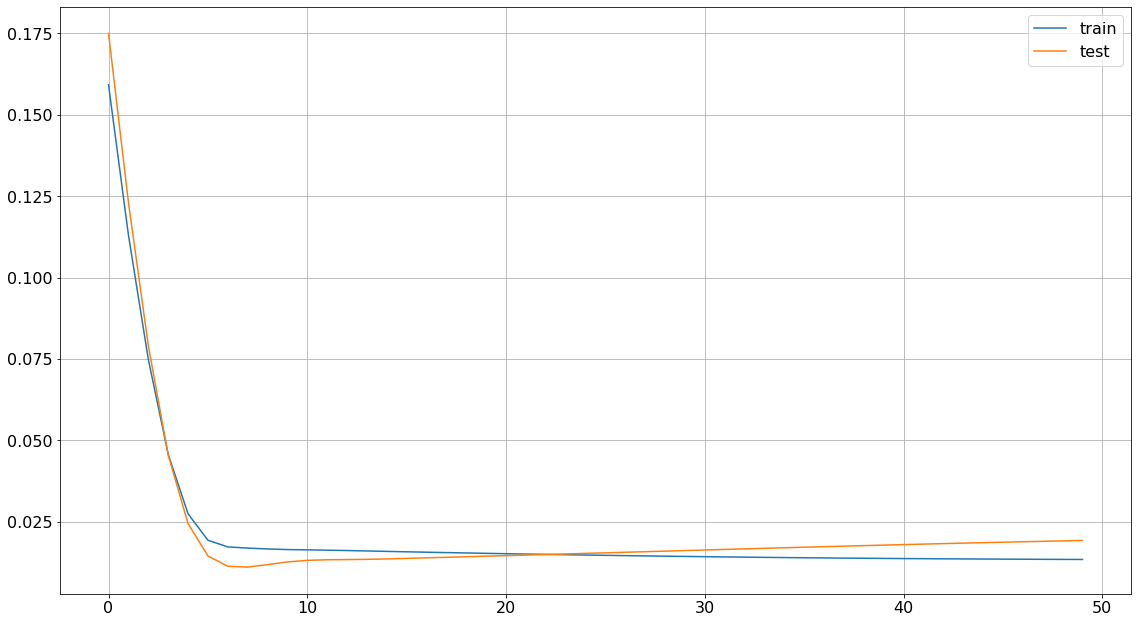

In [62]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.grid()
plt.legend()

In [63]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [64]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [65]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1083.03 RMSE
Test Score: 1241.15 RMSE


In [66]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookBack:len(trainPredict)+lookBack, :] = trainPredict

In [67]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookBack*2)+1:len(dataset)-1, :] = testPredict

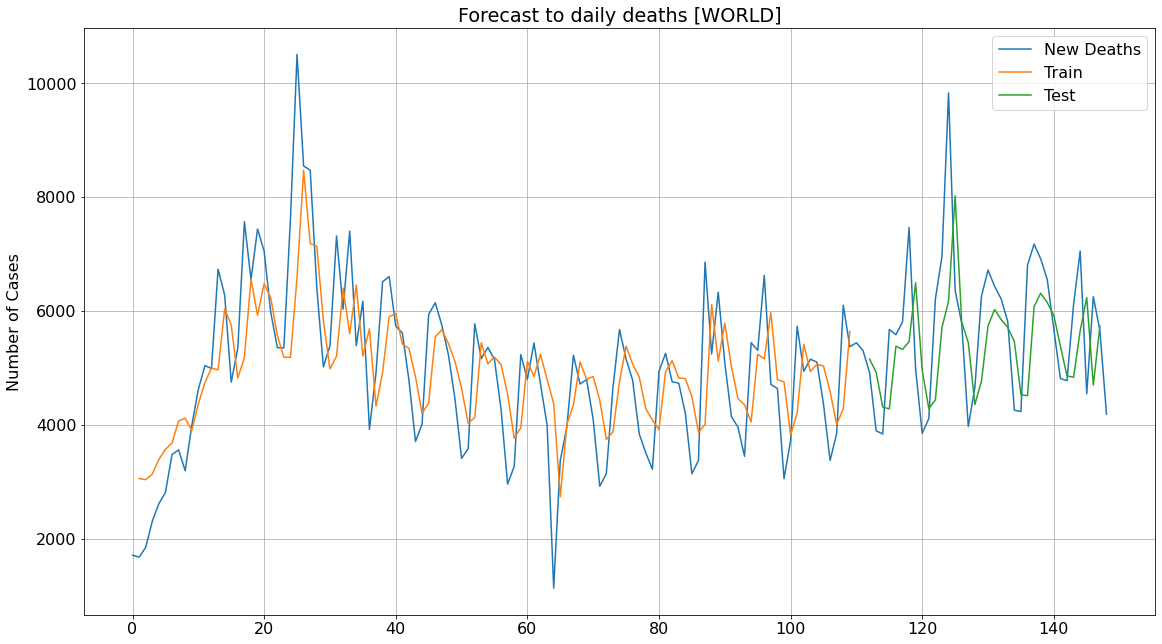

In [68]:
fig = plt.gcf()
fig.set_size_inches(19.20,10.80)

plt.ylabel('Number of Cases')
plt.title('Forecast to daily deaths [WORLD]')

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.gca().legend(('New Deaths','Train','Test'))

plt.grid()
plt.show()

### Simple Linear Regression

#### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

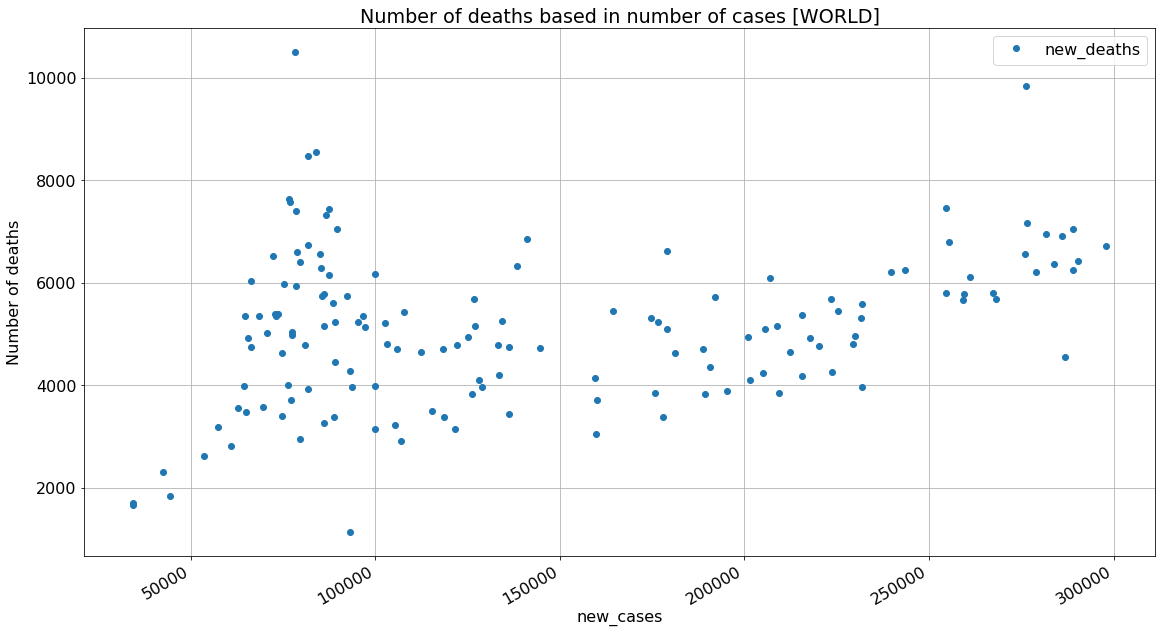

In [69]:
dfWorld.plot(x='new_cases', y='new_deaths', style='o', figsize=(19.20,10.80))

plt.ylabel('Number of deaths')
plt.title('Number of deaths based in number of cases [WORLD]')

ax = plt.gca()
plt.ticklabel_format(style='plain', axis='y', scilimits=(0,0))
plt.gcf().autofmt_xdate()

plt.grid()
plt.show()

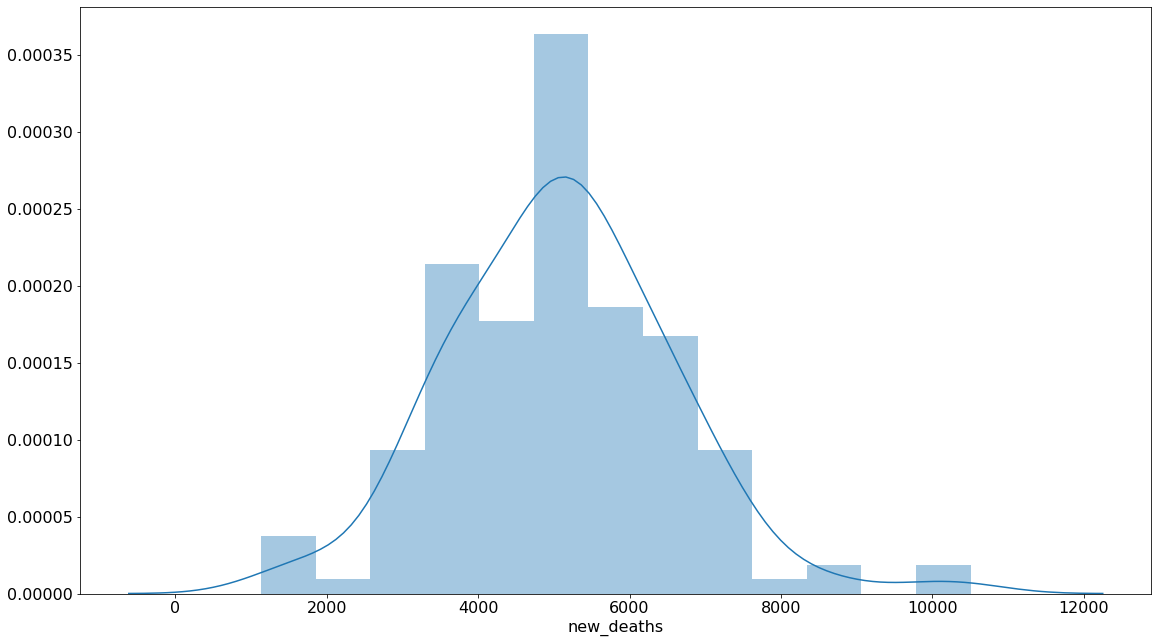

In [70]:
plt.figure(figsize=(19.20,10.80))
plt.tight_layout()
seabornInstance.distplot(dfWorld['new_deaths'])

In [71]:
X = dfWorld['new_deaths'].values.reshape(-1,1)
y = dfWorld['new_cases'].values.reshape(-1,1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [73]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [74]:
print(regressor.intercept_)

[69885.5026289]


In [75]:
print(regressor.coef_)

[[14.11436647]]


In [76]:
y_pred = regressor.predict(X_test)

In [77]:
dfLinear = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
dfLinear

Actual   Predicted
0  267318.0000 151861.7431
1  215487.0000 145679.6506
2   95291.0000 143745.9824
3  125093.0000 139568.1299
4   62907.0000 120118.5329
..         ...         ...
55 259486.0000 151438.3121
56 103252.0000 137592.1186
57  73667.0000 145905.4804
58 100004.0000 126201.8248
59 159619.0000 128403.6660

[60 rows x 2 columns]

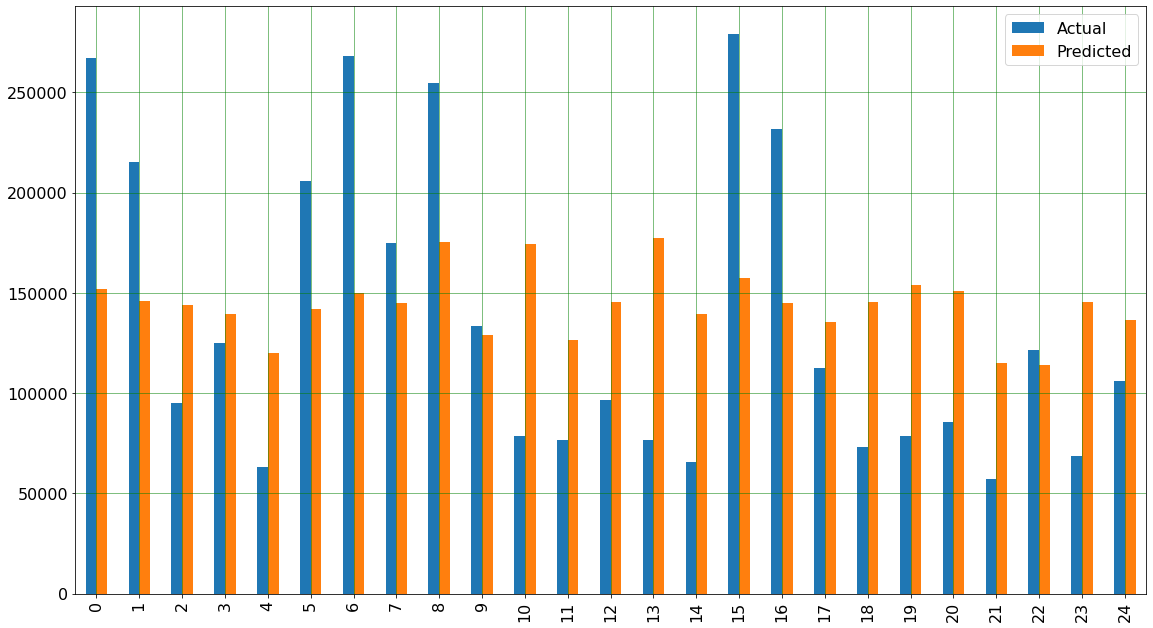

In [78]:
dfLinear = dfLinear.head(25)
dfLinear.plot(kind='bar',figsize=(19.20,10.80))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

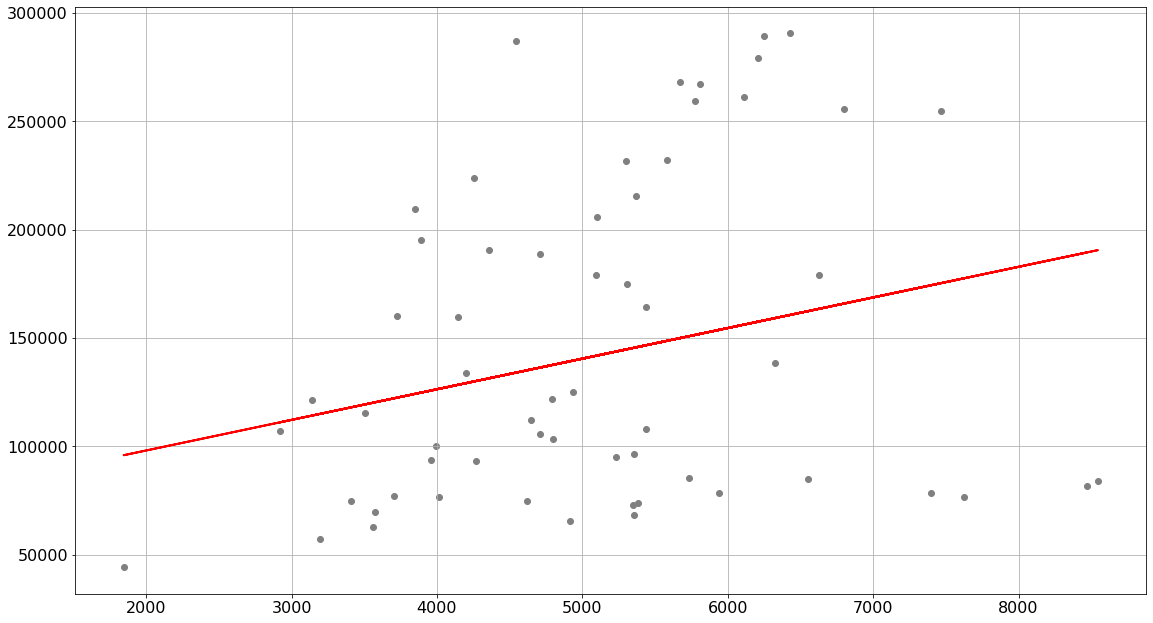

In [79]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.grid()
plt.show()

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error: 61925.69871375757
Mean Squared Error: 5120920524.62399
Root Mean Squared Error: 5120920524.62399


### Polynomial Regression

#### Source: https://towardsdatascience.com/understanding-regression-using-covid-19-dataset-detailed-analysis-be7e319e3a50

In [81]:
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
lin = LinearRegression()
lin.fit(X_poly, y)
pred = lin.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

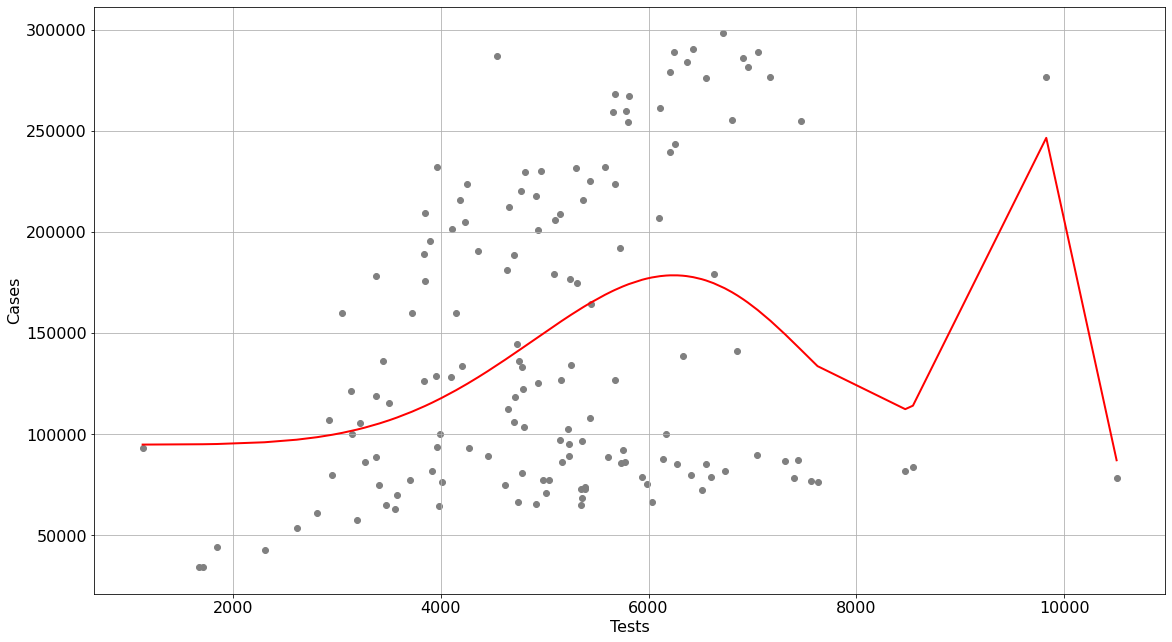

In [82]:
plt.figure(figsize=(19.20,10.80))
plt.scatter(X, y, color='gray')
plt.plot(new_X, new_y, color='red', linewidth=2)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.grid()
plt.show()